In [1]:
!python -m pip install --upgrade pip
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .
!pip install huggingface-hub
#!pip install diffusers
!huggingface-cli login

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Cloning into 'diffusers'...
remote: Enumerating objects: 24330, done.
remote: Counting objects: 100% (5273/5273), done.
remote: Compressing objects: 100% (584/584), done.
remote: Total 24330 (delta 5008), reused 4767 (delta 4666), pack-reused 19057
Receiving objects: 100% (24330/24330), 16.15 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (17686/17686), done.
/content/diffusers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%cd '/content/diffusers/examples/text_to_image/'
!pip install -r requirements.txt

/content/diffusers/examples/text_to_image
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 

In [ ]:
#!accelerate config default

In [ ]:
#!mv /root/.cache/huggingface/accelerate/default_config.yaml /content/

In [ ]:
#!mv /content/default_config.yaml /root/.cache/huggingface/accelerate/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from datasets import load_dataset

In [ ]:
# MODEL_NAME="runwayml/stable-diffusion-v1-5"
# OUTPUT_DIR="/content/drive/MyDrive/lora"
# HUB_MODEL_ID= "Alice-in-wonderland-lora"
# DATASET_NAME="/content/drive/MyDrive/dataset-diff/alice_img_data"

In [ ]:
dataset = load_dataset("lambdalabs/pokemon-blip-captions")
dataset

In [8]:
import os
from PIL import Image
data_files = {}

data_files["train"] = os.path.join('/content/drive/MyDrive/dataset-diff/alice_img_data', "**")
dataset = load_dataset(
    "imagefolder",
    data_files=data_files,
    cache_dir=None,
)


Resolving data files:   0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=280x510 at 0x7F7F48198820>,
 'Caterpillar smokes on mushrooms')

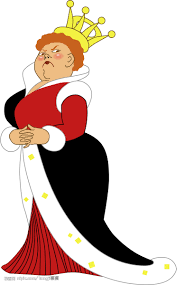

In [13]:
dataset['train']['image'][80]

In [14]:
dataset['train']['text'][80]

'Queen of Hearts is angry'

In [ ]:
#my_dataset = load_dataset('imagefolder', data_dir = '/content/train')

In [ ]:
#type(my_dataset['train']['additional_feature'])

In [19]:
%cd '/content/diffusers/examples/text_to_image/'
!python train_text_to_image_lora.py \
  --mixed_precision "fp16" \
  --pretrained_model_name_or_path "runwayml/stable-diffusion-v1-5" \
  --train_data_dir '/content/drive/MyDrive/dataset-diff/alice_img_data' \
  --hub_model_id "Alice_extend_brathief_e500" \
  --output_dir "/content/drive/MyDrive/lora" \
  --dataloader_num_workers 2 \
  --resolution 512 \
  --center_crop \
  --random_flip \
  --train_batch_size 2 \
  --gradient_accumulation_steps 4 \
  --max_train_steps 500 \
  --learning_rate 1e-04 \
  --max_grad_norm 1 \
  --lr_scheduler "cosine" \
  --lr_warmup_steps 0 \
  --push_to_hub \
  --checkpointing_steps 250 \
  --validation_prompt "Alice play golf with hatter" \
  --validation_epochs 500 \
  --seed 1337

/content/diffusers/examples/text_to_image
2023-04-22 13:39:06.203594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/accelerate/accelerator.py:249: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
04/22/2023 13:39:08 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'thresholding', 'dynamic_thresholding_ratio', 'clip_sample_range', 'sample_max_value', 'prediction_type', 'variance_type'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was not found in config. Values will be initialized to default values.
{'dual_cross_attention', 'conv_out_kernel', 'upcast_attention', 'conv_in_kernel', 'projection_class_embeddings_input_dim', 'class_embed_type', 'resnet_skip_time_act', 'mi